<a href="https://colab.research.google.com/github/koci1005/c-programming/blob/main/Heart%20disease%20detection%20using%20deep%20learning%20ANN%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single-Layered Perceptron
- Perceptron
- Various activation functions in neural networks—unit step, sigmoid, ReLU, softmax, and hyperbolic functions Single Layer Perceptron

MLP - Regression & Classification concepts
- Introduction to Multilayer Neural Networks
- Concept of deep neural networks
- Multi-layer perceptron
- Neural network hyperparameters
- Backpropagation, forward propagation, overfitting, hyperparameters.
- Training of neural networks
- The various techniques used in the training of artificial neural networks
- Gradient descent rule
- Perceptron learning rule
- Tuning learning rate
- Stochastic process
- Optimization techniques


Activation function: https://www.v7labs.com/blog/neural-networks-activation-functions

Optimizer Algorithms: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#What_Are_Optimizers_in_Deep_Learning?

Optimizer Graphical implementation: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Including bias term
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Adding bias term
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                pred = self.predict(X[i])
                self.weights += self.lr * (y[i] - pred) * np.insert(X[i], 0, 1)

# Example Usage
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])  # AND logic gate

perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

# Predictions
for sample in X:
    print(f'Input: {sample}, Predicted: {perceptron.predict(sample)}')

Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


In [ ]:
# Unit Step Function
def unit_step(x):
    return np.where(x >= 0, 1, 0)

In [ ]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# ReLU Function
def relu(x):
    return np.maximum(0, x)

In [ ]:
# Softmax Function
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

In [ ]:
# Hyperbolic Tangent (Tanh)
def tanh(x):
    return np.tanh(x)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create an MLP model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training Data
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0,1,1,0])  # XOR problem

# Train the model
model.fit(X_train, y_train, epochs=60, verbose=1)

# Predictions
print(model.predict(X_train))

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7432
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2500 - loss: 0.7395
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5000 - loss: 0.7358
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5000 - loss: 0.7320
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5000 - loss: 0.7283
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5000 - loss: 0.7249
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5000 - loss: 0.7219
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5000 - loss: 0.7189
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5000 - loss: 0.7160
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.7130
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7500 - loss: 0.7103
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7500 - loss: 0.7077
Epoch 

In [ ]:
# Gradient Descent Rule:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training Data
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0,1,1,0])  # XOR problem

# Train the model
model.fit(X_train, y_train, epochs=60, verbose=1)

# Predictions
print(model.predict(X_train))

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - accuracy: 0.7500 - loss: 0.5902
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7500 - loss: 0.5901
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7500 - loss: 0.5899
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.5897
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.5896
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.5894
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.5893
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7500 - loss: 0.5892
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.5891
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.5891
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.5890
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.5889


In [ ]:
# Adam Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training Data
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0,1,1,0])  # XOR problem

# Train the model
model.fit(X_train, y_train, epochs=60, verbose=1)

# Predictions
print(model.predict(X_train))

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.5859
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.5982
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.5803
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.5559
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.5449
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.5362
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.5232
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.5116
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.4993
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.4850
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.4695
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.4547
Ep

In [ ]:
# Create an MLP model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dropout(0.5),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Training Data
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0,1,1,0])  # XOR problem

# Train the model
model.fit(X_train, y_train, epochs=60, verbose=1)

# Predictions
print(model.predict(X_train))

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 0.7126
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6967
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.6779
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7500 - loss: 0.6782
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7500 - loss: 0.6917
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6738
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.6898
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6742
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7500 - loss: 0.6919
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.6829
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0000e+00 - loss: 0.7051
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.733

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.4914753 ]
 [0.5037618 ]
 [0.52739644]
 [0.51164865]]


In [ ]:
# Create an MLP model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Adam Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training Data
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0,1,1,0])  # XOR problem

# Train the model
model.fit(X_train, y_train, epochs=60, verbose=1)

# Predictions
print(model.predict(X_train))

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7203
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7081
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.6998
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.6943
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6896
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5000 - loss: 0.6846
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6797
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6766
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6735
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.6700
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.6660
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.6618
Ep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt

HD3 = pd.read_csv("/content/drive/MyDrive/Spring 2025 Course Deep Learning/12th class/dataset 3/cardio_disease.csv")

# Cardiovascular_Disease_Dataset.csv

HD5 = pd.read_csv("/content/drive/MyDrive/Spring 2025 Course Deep Learning/12th class/Dataset 5/Cardiovascular_Disease_Dataset.csv")

In [ ]:
HD3names = pd.read_csv('/content/drive/MyDrive/Spring 2025 Course Deep Learning/12th class/dataset 3/cardio_data_description.txt',sep = "-")
HD3names = HD3names.reset_index()

In [ ]:
HD3names.columns = ['cols','abb_col_names']

In [ ]:
HD3names

,cols,abb_col_names
0,id,Id
1,age,Age
2,gender,Gender
3,height,Height
4,weight,Weight
5,ap_hi,Systolic blood pressure
6,ap_lo,Diastolic blood pressure
7,cholesterol,Cholesterol
8,gluc,Glucose
9,smoke,Smoking


In [ ]:
HD5names = pd.read_csv('/content/drive/MyDrive/Spring 2025 Course Deep Learning/12th class/Dataset 5/HD5 description.txt',sep = "-")
HD5names = HD5names.reset_index()
HD5names.columns = ['cols','abb_col_names']

In [ ]:
HD5names

,cols,abb_col_names
0,patientid,Id
1,age,Age
2,gender,Gender
3,chestpain,Cheast pain type
4,restingBP,Resting blood pressure
5,serumcholestrol,Serum cholesterol
6,fastingbloodsugar,Fasting blood sugar
7,restingrelectro,Resting electrocardiogram results
8,maxheartrate,Maximum heart rate achieved
9,exerciseangia,Exercise induced angina


In [ ]:
HD5.target.value_counts()

,count
target,
1,580
0,420


In [ ]:
HD3.cardio.value_counts()

,count
cardio,
0,35021
1,34979


In [ ]:
HD5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


<ipython-input-36-44bb283f0743>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=HD5, palette="bwr")


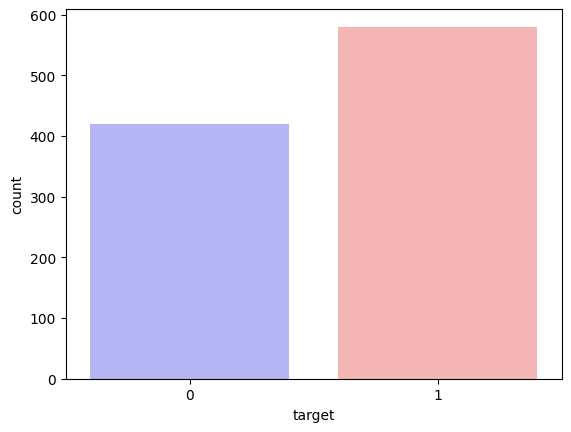

In [ ]:
sns.countplot(x="target", data=HD5, palette="bwr")
plt.show()

# Single Datasets prepare to evaluate parameters

In [ ]:
HD5_data_raw = HD5.drop(['patientid','target'], axis = 1)

In [ ]:
HD5_data_raw

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2
996,47,1,3,143,258,1,1,98,1,5.7,1,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2


# Impute

In [ ]:
def extract_cat_num(HD):
    cat_col=[col for col in HD.columns if HD[col].dtype=='O']
    num_col=[col for col in HD.columns if HD[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(HD5)

In [ ]:
num_col

['patientid',
 'age',
 'gender',
 'chestpain',
 'restingBP',
 'serumcholestrol',
 'fastingbloodsugar',
 'restingrelectro',
 'maxheartrate',
 'exerciseangia',
 'oldpeak',
 'slope',
 'noofmajorvessels',
 'target']

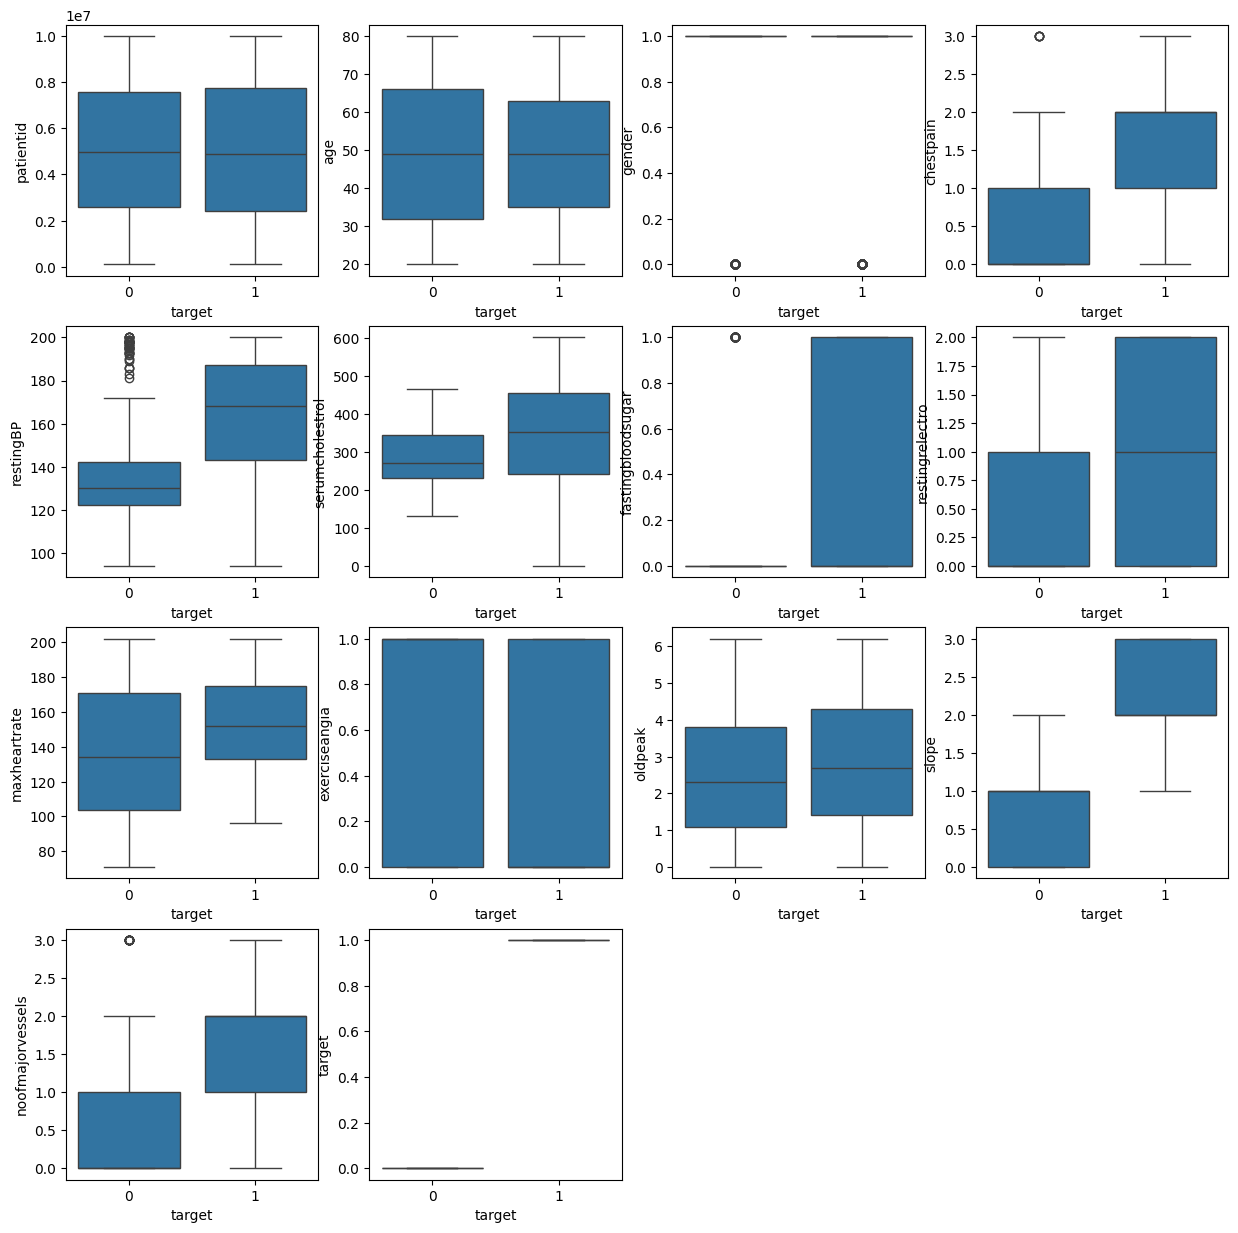

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=HD5['target'],y=i[1],data=HD5.reset_index())

In [ ]:
from sklearn.impute import SimpleImputer
# stategy = 'median','mean','most_frequent'
impute = SimpleImputer(strategy = 'mean')
data_array5 = impute.fit_transform(HD5_data_raw)

# Raw dataframe

In [ ]:
HD5_df = pd.DataFrame(data_array5, columns = HD5_data_raw.columns)

In [ ]:
HD5_df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53.0,1.0,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0
1,40.0,1.0,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0
2,49.0,1.0,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0
3,43.0,1.0,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0
4,31.0,1.0,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48.0,1.0,2.0,139.0,349.0,0.0,2.0,183.0,1.0,5.6,2.0,2.0
996,47.0,1.0,3.0,143.0,258.0,1.0,1.0,98.0,1.0,5.7,1.0,0.0
997,69.0,1.0,0.0,156.0,434.0,1.0,0.0,196.0,0.0,1.4,3.0,1.0
998,45.0,1.0,1.0,186.0,417.0,0.0,1.0,117.0,1.0,5.9,3.0,2.0


In [ ]:
HD5_df['patientid'] = HD5.patientid
HD5_df['target'] = HD5.target

In [ ]:
HD5_df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,patientid,target
0,53.0,1.0,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,103368,1
1,40.0,1.0,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,119250,0
2,49.0,1.0,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,119372,0
3,43.0,1.0,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,132514,1
4,31.0,1.0,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,146211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48.0,1.0,2.0,139.0,349.0,0.0,2.0,183.0,1.0,5.6,2.0,2.0,9949544,1
996,47.0,1.0,3.0,143.0,258.0,1.0,1.0,98.0,1.0,5.7,1.0,0.0,9953423,0
997,69.0,1.0,0.0,156.0,434.0,1.0,0.0,196.0,0.0,1.4,3.0,1.0,9965859,1
998,45.0,1.0,1.0,186.0,417.0,0.0,1.0,117.0,1.0,5.9,3.0,2.0,9988507,1


# Main Feature and Target setup

In [ ]:
X5 = HD5_df.drop('target', axis = 1)
Y5 = HD5_df['target']

In [ ]:
X5

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,patientid
0,53.0,1.0,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0,103368
1,40.0,1.0,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0,119250
2,49.0,1.0,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0,119372
3,43.0,1.0,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0,132514
4,31.0,1.0,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0,146211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48.0,1.0,2.0,139.0,349.0,0.0,2.0,183.0,1.0,5.6,2.0,2.0,9949544
996,47.0,1.0,3.0,143.0,258.0,1.0,1.0,98.0,1.0,5.7,1.0,0.0,9953423
997,69.0,1.0,0.0,156.0,434.0,1.0,0.0,196.0,0.0,1.4,3.0,1.0,9965859
998,45.0,1.0,1.0,186.0,417.0,0.0,1.0,117.0,1.0,5.9,3.0,2.0,9988507


In [ ]:
X5 = X5.drop('patientid', axis= 1 )

In [ ]:
X5


,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53.0,1.0,2.0,171.0,0.0,0.0,1.0,147.0,0.0,5.3,3.0,3.0
1,40.0,1.0,0.0,94.0,229.0,0.0,1.0,115.0,0.0,3.7,1.0,1.0
2,49.0,1.0,2.0,133.0,142.0,0.0,0.0,202.0,1.0,5.0,1.0,0.0
3,43.0,1.0,0.0,138.0,295.0,1.0,1.0,153.0,0.0,3.2,2.0,2.0
4,31.0,1.0,1.0,199.0,0.0,0.0,2.0,136.0,0.0,5.3,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48.0,1.0,2.0,139.0,349.0,0.0,2.0,183.0,1.0,5.6,2.0,2.0
996,47.0,1.0,3.0,143.0,258.0,1.0,1.0,98.0,1.0,5.7,1.0,0.0
997,69.0,1.0,0.0,156.0,434.0,1.0,0.0,196.0,0.0,1.4,3.0,1.0
998,45.0,1.0,1.0,186.0,417.0,0.0,1.0,117.0,1.0,5.9,3.0,2.0


In [ ]:
Y5

,target
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


# All libraries import

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import time

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
# Dense Neural Network
from tensorflow.keras.layers import Dense, Dropout
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, PReLU

#from tensorflow.keras.layers import PReLU, ELU, Activation
#from tensorflow.keras.layers import Dense, LeakyReLU
from keras.layers import Dense, Activation, LeakyReLU, PReLU, ELU

# Different Combination of Hidden neurons Generator

#### Two combinations of Hidden neorons and iterations

In [ ]:
# Number of combinations
num_combinations = 12

# Number of hidden layers
num_hidden_layers = 2

# Generate twelve combinations of three hidden layers
hidden_layer_combinations = []
for i in range(num_combinations):
    hidden_layers = tuple(np.random.randint(5, 16, size=num_hidden_layers)) # range will be 5 to 16
    hidden_layer_combinations.append(hidden_layers)

# Generate a random number of epochs/iterations for each combination
iterations = np.random.randint(30, 90, size=num_combinations)  # iteration will be 1 to 90

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame({
    'Combination of neurons': hidden_layer_combinations,
    'Epochs': iterations
})

# Display the DataFrame
pd.DataFrame(results_df)

,Combination of neurons,Epochs
0,"(12, 9)",75
1,"(8, 8)",89
2,"(10, 6)",36
3,"(9, 5)",70
4,"(8, 7)",36
5,"(15, 14)",71
6,"(14, 15)",51
7,"(5, 15)",42
8,"(14, 11)",89
9,"(6, 15)",45


#### Four combinations of Hidden neorons and iterations

In [ ]:
num_combinations = 12
num_hidden_layers = 4

hidden_layer_combinations = []
for i in range(num_combinations):
    hidden_layers = tuple(np.random.randint(15, 50, size=num_hidden_layers))
    hidden_layer_combinations.append(hidden_layers)

iterations = np.random.randint(30, 90, size=num_combinations)

results_df = pd.DataFrame({
    'Combination of neurons': hidden_layer_combinations,
    'Epochs': iterations
})

pd.DataFrame(results_df)

,Combination of neurons,Epochs
0,"(41, 48, 36, 29)",59
1,"(23, 38, 40, 16)",84
2,"(25, 35, 18, 21)",78
3,"(21, 35, 17, 37)",64
4,"(34, 16, 22, 15)",73
5,"(19, 37, 28, 17)",77
6,"(19, 28, 35, 44)",63
7,"(48, 46, 43, 34)",81
8,"(23, 33, 31, 15)",74
9,"(42, 48, 22, 36)",48


#### Six combinations of Hidden neorons and iterations

In [ ]:
num_combinations = 12
num_hidden_layers = 6

hidden_layer_combinations = []
for i in range(num_combinations):
    hidden_layers = tuple(np.random.randint(5, 16, size=num_hidden_layers))
    hidden_layer_combinations.append(hidden_layers)

iterations = np.random.randint(1, 90, size=num_combinations)

results_df = pd.DataFrame({
    'Combination of neurons': hidden_layer_combinations,
    'Epochs': iterations
})

pd.DataFrame(results_df)

,Combination of neurons,Epochs
0,"(7, 9, 14, 5, 13, 6)",59
1,"(14, 5, 9, 8, 10, 5)",67
2,"(15, 14, 11, 10, 15, 10)",73
3,"(6, 6, 11, 9, 9, 9)",68
4,"(6, 8, 12, 10, 11, 14)",15
5,"(5, 6, 12, 10, 13, 9)",19
6,"(13, 7, 5, 8, 5, 5)",57
7,"(13, 5, 7, 5, 9, 11)",79
8,"(6, 15, 6, 6, 12, 11)",60
9,"(14, 9, 6, 13, 10, 13)",89


# Model 1 (16,17). Activation('relu')+ activation= 'sigmoid'+ loss='binary_crossentropy' | HD5 |

#### Two hidden layer

In [ ]:

# Assume 'target' is the column you want to predict
X = X5
Y = Y5

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_interim, y_train, y_interim = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_interim, y_interim, test_size=0.5, random_state=42)

# Define the combinations of neurons and epochs
combinations = [
    {'neurons': (10, 13), 'epochs': 45},
    {'neurons': (13, 15), 'epochs': 10},
    {'neurons': (5, 7)	, 'epochs': 3},
    {'neurons': (8, 15)	, 'epochs': 31},
    {'neurons': (6, 15)	, 'epochs': 51},
    {'neurons': (5, 15)	, 'epochs': 20},
    {'neurons': (7, 7)	, 'epochs': 47},
    {'neurons': (8, 11)	, 'epochs': 86},
    {'neurons': (12, 11), 'epochs': 69},
    {'neurons': (12, 10), 'epochs': 38},
    {'neurons': (10, 8)	, 'epochs': 81},
    {'neurons': (14, 10), 'epochs': 7},
]

results = []

for combination in combinations:
    start_time = time.time()

    # Create and train MLP with Swish activation for hidden layers and linear activation for output layer
    model = Sequential()
    model.add(Dense(combination['neurons'][0], input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dense(combination['neurons'][1]))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))  # Linear activation for regression
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=combination['epochs'], verbose=0)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, (model.predict(X_train) > 0.5).astype(int))
    accuracy_test = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    mse = mean_squared_error(y_test, model.predict(X_test))
    precision = precision_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    recall = recall_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    f1 = f1_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    accuracy_validation = accuracy_score(y_validation, (model.predict(X_validation) > 0.5).astype(int))

    results.append({
        'Combination of Neurons': combination['neurons'],
        'Epochs': combination['epochs'],
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy_test,
        'Validation Accuracy': accuracy_validation,
        'CPU times': time.time() - start_time,
        'MSE': mse,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Combination of Neurons,Epochs,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score
0,"(10, 13)",45,0.971429,0.966667,0.980000,13.720032,0.027121,0.960526,0.973333,0.966887
1,"(13, 15)",10,0.925714,0.946667,0.953333,3.552939,0.051467,0.935065,0.960000,0.947368
2,"(5, 7)",3,0.651429,0.680000,0.660000,2.697544,0.217978,0.680000,0.680000,0.680000
3,"(8, 15)",31,0.958571,0.973333,0.960000,6.853662,0.025154,0.986301,0.960000,0.972973
4,"(6, 15)",51,0.982857,0.986667,0.986667,8.831741,0.019117,0.986667,0.986667,0.986667
5,"(5, 15)",20,0.924286,0.913333,0.926667,5.874719,0.072305,0.878049,0.960000,0.917197
6,"(7, 7)",47,0.960000,0.953333,0.980000,7.392047,0.034119,0.935897,0.973333,0.954248
7,"(8, 11)",86,0.980000,0.973333,0.986667,14.411930,0.017681,0.961039,0.986667,0.973684
8,"(12, 11)",69,0.981429,0.980000,0.980000,11.621156,0.018014,0.973684,0.986667,0.980132
9,"(12, 10)",38,0.974286,0.960000,0.986667,8.335073,0.027788,0.972603,0.946667,0.959459


#### Four Hidden Layer

In [ ]:

# Assume 'target' is the column you want to predict
X = X5
Y = Y5

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_interim, y_train, y_interim = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_interim, y_interim, test_size=0.5, random_state=42)

# Define the combinations of neurons and epochs
combinations = [
    {'neurons': (6, 5, 12, 13)	, 'epochs': 68},
    {'neurons': (12, 13, 15, 12), 'epochs': 66},
    {'neurons': (5, 14, 14, 5), 'epochs': 31},
    {'neurons': (8, 12, 14, 13), 'epochs': 66},
    {'neurons': (12, 13, 11, 10), 'epochs': 34},
    {'neurons': (15, 10, 9, 7), 'epochs': 47},
    {'neurons': (10, 14, 8, 13), 'epochs': 69},
    {'neurons': (7, 5, 5, 14)	, 'epochs': 43},
    {'neurons': (10, 12, 7, 14), 'epochs': 49},
    {'neurons': (8, 5, 9, 15), 'epochs': 28},
    {'neurons': (13, 8, 7, 12)	, 'epochs': 7},
    {'neurons': (9, 6, 10, 10)	, 'epochs': 30},
]

results = []

for combination in combinations:
    start_time = time.time()

    # Create and train MLP with Swish activation for hidden layers and linear activation for output layer
    model = Sequential()
    model.add(Dense(combination['neurons'][0], input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dense(combination['neurons'][1]))
    model.add(Activation('relu'))
    model.add(Dense(combination['neurons'][2]))
    model.add(Activation('relu'))
    model.add(Dense(combination['neurons'][3]))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))  # Linear activation for regression
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=combination['epochs'], verbose=0)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, (model.predict(X_train) > 0.5).astype(int))
    accuracy_test = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    mse = mean_squared_error(y_test, model.predict(X_test))
    precision = precision_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    recall = recall_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    f1 = f1_score(y_test, (model.predict(X_test) > 0.5).astype(int))
    accuracy_validation = accuracy_score(y_validation, (model.predict(X_validation) > 0.5).astype(int))

    results.append({
        'Combination of Neurons': combination['neurons'],
        'Epochs': combination['epochs'],
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy_test,
        'Validation Accuracy': accuracy_validation,
        'CPU times': time.time() - start_time,
        'MSE': mse,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Combination of Neurons,Epochs,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score
0,"(6, 5, 12, 13)",68,0.985714,0.940000,0.960000,16.091487,0.042810,0.934211,0.946667,0.940397
1,"(12, 13, 15, 12)",66,0.997143,0.946667,0.980000,12.309690,0.032569,0.958904,0.933333,0.945946
2,"(5, 14, 14, 5)",31,0.964286,0.946667,0.966667,6.423543,0.032358,0.946667,0.946667,0.946667
3,"(8, 12, 14, 13)",66,0.985714,0.966667,0.980000,12.669586,0.027021,0.986111,0.946667,0.965986
4,"(12, 13, 11, 10)",34,0.980000,0.966667,0.986667,8.460880,0.023873,0.986111,0.946667,0.965986
5,"(15, 10, 9, 7)",47,0.994286,0.980000,0.953333,9.095057,0.023060,0.986486,0.973333,0.979866
6,"(10, 14, 8, 13)",69,0.992857,0.953333,0.980000,13.573097,0.038844,0.947368,0.960000,0.953642
7,"(7, 5, 5, 14)",43,0.990000,0.966667,0.966667,8.794905,0.030529,0.972973,0.960000,0.966443
8,"(10, 12, 7, 14)",49,0.992857,0.966667,0.973333,10.535939,0.031351,0.960526,0.973333,0.966887
9,"(8, 5, 9, 15)",28,0.970000,0.966667,0.993333,6.546155,0.027627,0.972973,0.960000,0.966443
